In [1]:
from utils import *
from nearest_neighbor import *
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
pd.set_option('max_columns', None)
from HAC_clustering import *

In [2]:
# path_data = "/Users/lou/Thesis/BCR_Clone_Identification/Data/"
# path_data = "/Users/lou/Box/Human Lymph Node/"
path_data = "/home/siyuan/thesis/Data/"

In [8]:
samples = ["sample%s"%n for n in [76,77,78,79,82,83,86,87,88,89,90,91,92,93,94,95,96,97,99]]

In this notebook:
1. the data is cleaned, s.t. duplicated V-D-J sequences are removed.
2. samples 76-99 are combined to get the d-to-the-nearest distribution and cutoff value is detected using bimodal method.
3. using the detected cutoff, sample 90 are clustered based on CDR3 similarity / V-J assignment+CDR3 similarity.
4. using the detected cutoff, sample 76-99 are clustered based on CDR3 similarity / V-J assignment+CDR3 similarity.

Conclusion:
- Threshold detected using Hamming distance across all sequences of the same length: 0.117886
- Cluster numbers identified by clustering on CDR3 similarity v.s. clustering on V,J assignment + CDR3 similarity: 71/148 for sample 90, 3155/5690 for all samples. Could due to imprecise threshold or imprecise V,J assignment
- From the distance matrix: different samples do not share many common clusters

## Read, check and clean the data

In [4]:
# for sample in samples:
#     path_sample = path_data + sample + "/"
#     Nt_file = path_sample+"3_Nt-sequences.txt"
#     outfile = path_data+sample+"_Nt_info.csv"
#     print("========== %s ==========="%sample)
#     read_data(Nt_file,outfile)

========== sample76 ===========


/Users/lou/Lib/anaconda3/envs/thesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


128104 sequences in total.
Drop 91467 duplicated sequences.
Drop 4438 sequences by filtering V-DOMAIN Functionality.
32199 sequences remain.
Drop 0 rows contain nan.
========== sample77 ===========


/Users/lou/Lib/anaconda3/envs/thesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


109624 sequences in total.
Drop 76457 duplicated sequences.
Drop 5207 sequences by filtering V-DOMAIN Functionality.
27960 sequences remain.
Drop 0 rows contain nan.
========== sample78 ===========


/Users/lou/Lib/anaconda3/envs/thesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


139906 sequences in total.
Drop 101454 duplicated sequences.
Drop 7602 sequences by filtering V-DOMAIN Functionality.
30850 sequences remain.
Drop 0 rows contain nan.
========== sample79 ===========
103389 sequences in total.
Drop 79078 duplicated sequences.
Drop 5617 sequences by filtering V-DOMAIN Functionality.
18694 sequences remain.
Drop 0 rows contain nan.
========== sample82 ===========


/Users/lou/Lib/anaconda3/envs/thesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


119273 sequences in total.
Drop 83818 duplicated sequences.
Drop 2641 sequences by filtering V-DOMAIN Functionality.
32814 sequences remain.
Drop 0 rows contain nan.
========== sample83 ===========


/Users/lou/Lib/anaconda3/envs/thesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


128558 sequences in total.
Drop 92039 duplicated sequences.
Drop 2856 sequences by filtering V-DOMAIN Functionality.
33663 sequences remain.
Drop 0 rows contain nan.
========== sample86 ===========
97131 sequences in total.
Drop 73995 duplicated sequences.
Drop 3500 sequences by filtering V-DOMAIN Functionality.
19636 sequences remain.
Drop 0 rows contain nan.
========== sample87 ===========


/Users/lou/Lib/anaconda3/envs/thesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


96238 sequences in total.
Drop 62371 duplicated sequences.
Drop 5883 sequences by filtering V-DOMAIN Functionality.
27984 sequences remain.
Drop 0 rows contain nan.
========== sample88 ===========


/Users/lou/Lib/anaconda3/envs/thesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


127292 sequences in total.
Drop 98087 duplicated sequences.
Drop 4033 sequences by filtering V-DOMAIN Functionality.
25172 sequences remain.
Drop 0 rows contain nan.
========== sample89 ===========
82600 sequences in total.
Drop 60246 duplicated sequences.
Drop 978 sequences by filtering V-DOMAIN Functionality.
21376 sequences remain.
Drop 0 rows contain nan.
========== sample90 ===========
81317 sequences in total.
Drop 56154 duplicated sequences.
Drop 5968 sequences by filtering V-DOMAIN Functionality.
19195 sequences remain.
Drop 0 rows contain nan.
========== sample91 ===========


/Users/lou/Lib/anaconda3/envs/thesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


147662 sequences in total.
Drop 118301 duplicated sequences.
Drop 5144 sequences by filtering V-DOMAIN Functionality.
24217 sequences remain.
Drop 0 rows contain nan.
========== sample92 ===========


/Users/lou/Lib/anaconda3/envs/thesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


77038 sequences in total.
Drop 51811 duplicated sequences.
Drop 2316 sequences by filtering V-DOMAIN Functionality.
22911 sequences remain.
Drop 0 rows contain nan.
========== sample93 ===========


/Users/lou/Lib/anaconda3/envs/thesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (20,22) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


101580 sequences in total.
Drop 76107 duplicated sequences.
Drop 4575 sequences by filtering V-DOMAIN Functionality.
20898 sequences remain.
Drop 0 rows contain nan.
========== sample94 ===========
95173 sequences in total.
Drop 55039 duplicated sequences.
Drop 6005 sequences by filtering V-DOMAIN Functionality.
34129 sequences remain.
Drop 0 rows contain nan.
========== sample95 ===========
85731 sequences in total.
Drop 47769 duplicated sequences.
Drop 5402 sequences by filtering V-DOMAIN Functionality.
32560 sequences remain.
Drop 0 rows contain nan.
========== sample96 ===========
89467 sequences in total.
Drop 55270 duplicated sequences.
Drop 4326 sequences by filtering V-DOMAIN Functionality.
29871 sequences remain.
Drop 0 rows contain nan.
========== sample97 ===========


/Users/lou/Lib/anaconda3/envs/thesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


88341 sequences in total.
Drop 51227 duplicated sequences.
Drop 5292 sequences by filtering V-DOMAIN Functionality.
31822 sequences remain.
Drop 0 rows contain nan.
========== sample99 ===========


/Users/lou/Lib/anaconda3/envs/thesis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


84681 sequences in total.
Drop 50734 duplicated sequences.
Drop 4293 sequences by filtering V-DOMAIN Functionality.
29654 sequences remain.
Drop 0 rows contain nan.


In [5]:
# # what does the warning mean?
# df = pd.read_csv(path_data+"sample76/3_Nt-sequences.txt", sep='\t')
# df

In [12]:
# df_all = pd.concat((pd.read_csv(path_data+sample+"_Nt_info.csv",sep='\t')) for sample in samples)
# outfile = path_data+"sample76-99_Nt_info.csv"
# df_all.to_csv(outfile, sep='\t', index=False)

## Calculate distance to the nearest (not identical) distribution using all sequence pairs

### Using Hamming distance

Only compute the distance when the sequence pair are of the same, but put everything together to get one distribution.

Comparable because the distance is normalized by the length.

**With duplicated sequences removed and all samples combined:**

In [16]:
# outfile = path_data+"sample76-99_Nt_info.csv"
# df = pd.read_csv(outfile,sep='\t')
# print("All sequence:",df.shape)
# df_unique = df.drop_duplicates(subset="V-D-J-REGION", ignore_index=True)
# print("Unique V-D-J sequence:",df_unique.shape)

All sequence: (515605, 7)
Unique V-D-J sequence: (501435, 7)


In [4]:
# %%time
# outfile = path_data+"sample76-99_Nt_info.csv"
# df = pd.read_csv(outfile,sep='\t')
# print("All sequence:",df.shape)
# df_unique = df.drop_duplicates(subset="JUNCTION", ignore_index=True)
# print("Unique junction sequence:",df_unique.shape)
# d_to_nearest_all,dis = cal_dist_to_nearest_all_exhaustive(df_unique,groupby=["JUNCTION length"])
# print("Length of the distance to nearest neighbor list: ",len(d_to_nearest_all))

All sequence: (515605, 7)
Unique junction sequence: (17793, 7)
For group ['JUNCTION length'] = 18.0: 
3 sequences, 6 calls, use 0.000045 seconds.
For group ['JUNCTION length'] = 21.0: 
5 sequences, 20 calls, use 0.000053 seconds.
For group ['JUNCTION length'] = 24.0: 
66 sequences, 4290 calls, use 0.006801 seconds.
For group ['JUNCTION length'] = 27.0: 
22 sequences, 462 calls, use 0.000872 seconds.
For group ['JUNCTION length'] = 30.0: 
153 sequences, 23256 calls, use 0.043976 seconds.
For group ['JUNCTION length'] = 33.0: 
145 sequences, 20880 calls, use 0.042033 seconds.
For group ['JUNCTION length'] = 36.0: 
523 sequences, 273006 calls, use 0.577718 seconds.
For group ['JUNCTION length'] = 39.0: 
323 sequences, 104006 calls, use 0.241306 seconds.
For group ['JUNCTION length'] = 42.0: 
708 sequences, 500556 calls, use 1.251336 seconds.
For group ['JUNCTION length'] = 45.0: 
1639 sequences, 2684682 calls, use 7.151390 seconds.
For group ['JUNCTION length'] = 48.0: 
969 sequences, 937

In [10]:
d_to_nearest_all = np.load(path_data+"d_to_nearest_sample76-99_a-based.npy")
dis = np.load(path_data+"dis_sample76-99_a-based.npy")

## Detect the cut-off

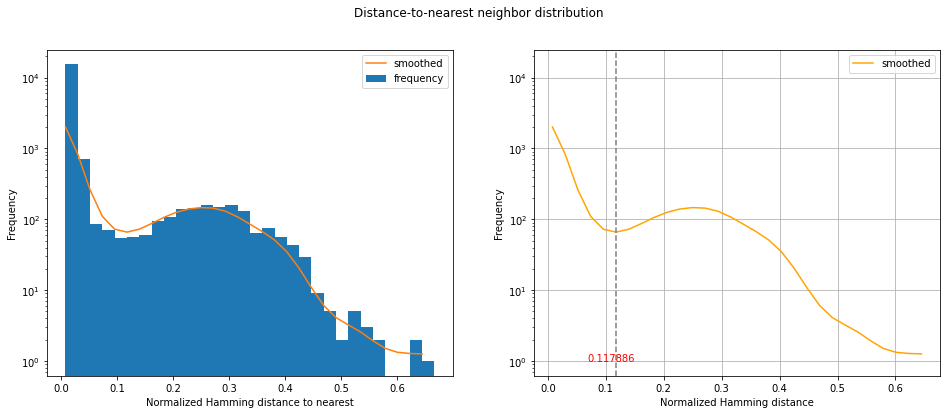

In [11]:
bins=30
cov = 1.5
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.suptitle("Distance-to-nearest neighbor distribution")

# the histogram
ax[0].hist(d_to_nearest_all,bins=bins,label="frequency")
ax[0].set_yscale('log')

ax[0].set_xlabel("Normalized Hamming distance to nearest")
ax[0].set_ylabel("Frequency")

# the smoothed curve
freq = np.histogram(d_to_nearest_all, bins=bins)
freq_pos = [f if f>0 else f+1 for f in freq[0]] # mask zero
smoothed_freq0 = gaussian_filter1d(np.log(freq_pos),cov)
ax[0].plot(freq[1][:-1],np.exp(smoothed_freq0), label='smoothed')
ax[0].legend()

# ___ detection of local minimums and maximums ___
min_ind = (np.diff(np.sign(np.diff(smoothed_freq0))) > 0).nonzero()[0] + 1 
# local min
loc_min = freq[1][min_ind]
ax[1].plot(freq[1][:-1],np.exp(smoothed_freq0), label='smoothed',c='orange')
ax[1].set_yscale('log')
ax[1].set_xlabel("Normalized Hamming distance")
ax[1].set_ylabel("Frequency")
ax[1].set_ylim(ax[0].get_ylim())
plt.axvline(loc_min,ymin=-0.002, linestyle='--', c='grey')
plt.text(loc_min-0.05, 1, "%1f"%loc_min[0], color='red')
plt.grid()
ax[1].legend()
plt.show()
# plt.savefig(figname)

## Clustering sample 90

### 1. based on CDR3

In [14]:
%%time
outfile = path_data+"sample90_Nt_info.csv"
df = pd.read_csv(outfile,sep='\t')
print("All sequence:",df.shape)
df_unique = df.drop_duplicates(subset="JUNCTION", ignore_index=True)
print("Unique junction sequence:",df_unique.shape)
d_to_nearest_all,dis = cal_dist_to_nearest_all_exhaustive(df_unique,groupby=["JUNCTION length"])

All sequence: (19195, 7)
Unique junction sequence: (623, 7)
For group ['JUNCTION length'] = 24.0: 
14 sequences, 182 calls, use 0.000305 seconds.
For group ['JUNCTION length'] = 30.0: 
2 sequences, 2 calls, use 0.000020 seconds.
For group ['JUNCTION length'] = 33.0: 
2 sequences, 2 calls, use 0.000020 seconds.
For group ['JUNCTION length'] = 39.0: 
7 sequences, 42 calls, use 0.000118 seconds.
For group ['JUNCTION length'] = 42.0: 
15 sequences, 210 calls, use 0.000510 seconds.
For group ['JUNCTION length'] = 45.0: 
64 sequences, 4032 calls, use 0.009781 seconds.
For group ['JUNCTION length'] = 48.0: 
61 sequences, 3660 calls, use 0.010066 seconds.
For group ['JUNCTION length'] = 51.0: 
16 sequences, 240 calls, use 0.000727 seconds.
For group ['JUNCTION length'] = 54.0: 
250 sequences, 62250 calls, use 0.177678 seconds.
For group ['JUNCTION length'] = 57.0: 
6 sequences, 30 calls, use 0.000115 seconds.
For group ['JUNCTION length'] = 60.0: 
63 sequences, 3906 calls, use 0.012847 seconds

In [15]:
d_threshold = loc_min

Automatic pdb calling has been turned OFF


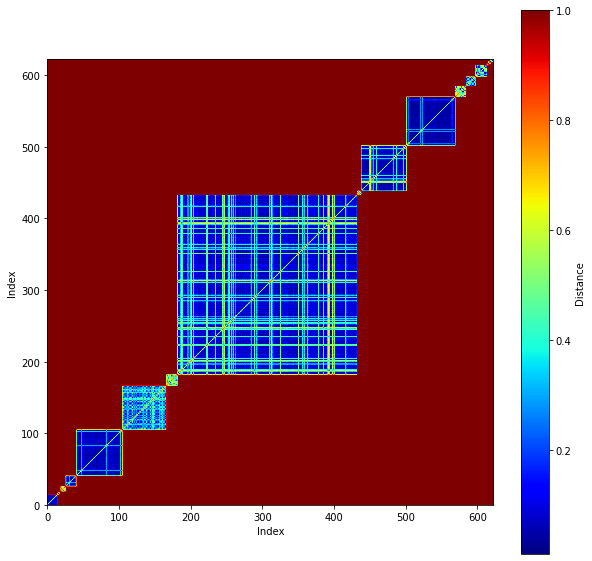



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 71 clusters


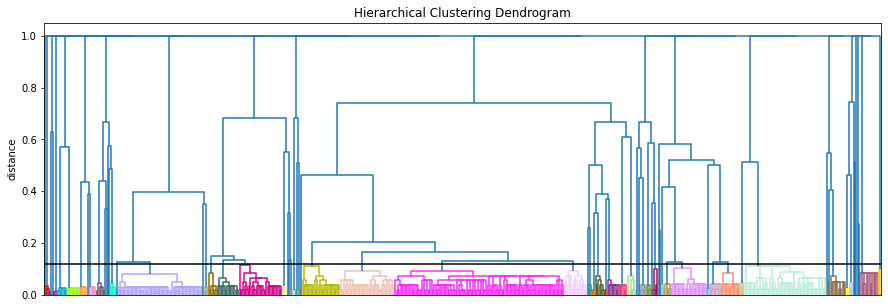

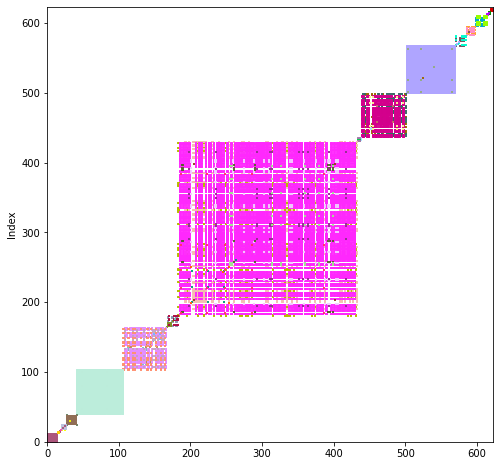

In [16]:
%pdb
clusters = cluster_HAC(dis, d_threshold)

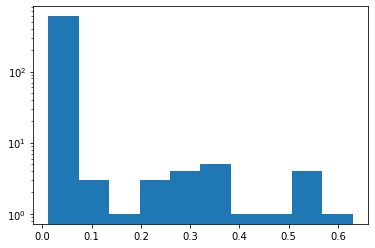

In [15]:
plt.hist(d_to_nearest_all)
plt.yscale("log")

In [16]:
np.min(d_to_nearest_all)

0.011904761904761904

### 2. based on V-J annotation + CDR3 similarities

In [9]:
outfile = path_data+"sample90_Nt_info.csv"
df = pd.read_csv(outfile,sep='\t')
print("All sequence:",df.shape)
df_unique = df.drop_duplicates(subset="JUNCTION", ignore_index=True)
print("Unique junction sequence:",df_unique.shape)

All sequence: (19195, 7)
Unique junction sequence: (623, 7)


In [9]:
keys, indices = group_seq(df_unique, keys=('V-GENE', 'J-GENE'))
for i in indices:
    print(len(i))

5
22
2
7
3
8
20
18
23
69
4
13
2
1
8
1
210
6
11
5
1
2
1
1
2
6
5
12
2
3
6
1
9
1
1
1
1
1
2
2
9
1
2
1
1
2
1
3
1
1
1
3
1
13
2
5
2
2
5
1
1
66
1


For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ3', 48.0): 
5 sequences, 20 calls, use 0.000077 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 24.0): 
6 sequences, 30 calls, use 0.000069 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 45.0): 
9 sequences, 72 calls, use 0.000192 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 48.0): 
4 sequences, 12 calls, use 0.000051 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ5', 60.0): 
2 sequences, 2 calls, use 0.000026 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 54.0): 
2 sequences, 2 calls, use 0.000023 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 60.0): 
3 sequences, 6 calls, use 0.000035 seconds.
For group ['V-GENE', 'J

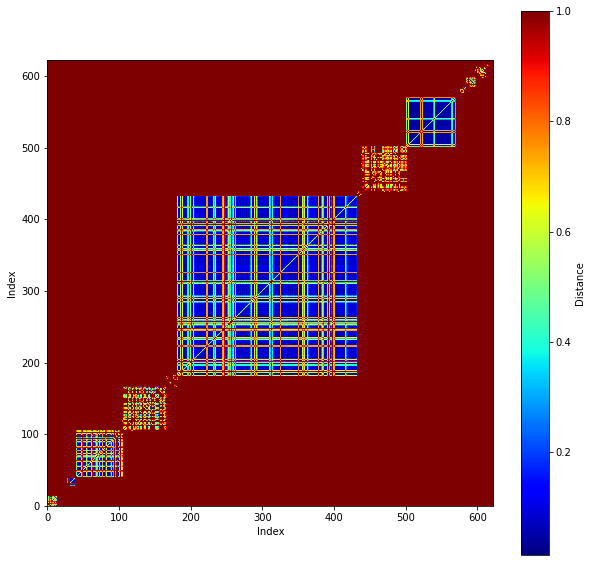



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = 0.117886 there is 148 clusters


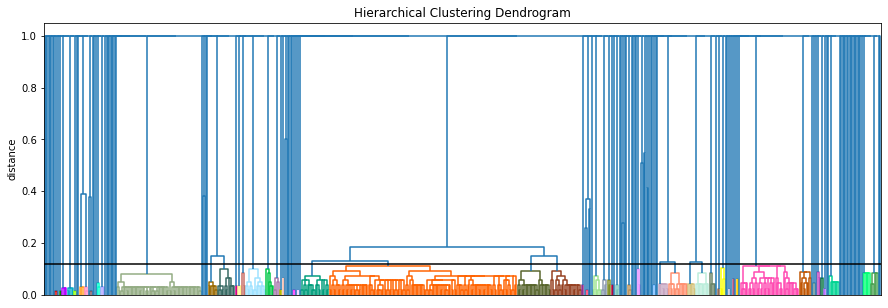

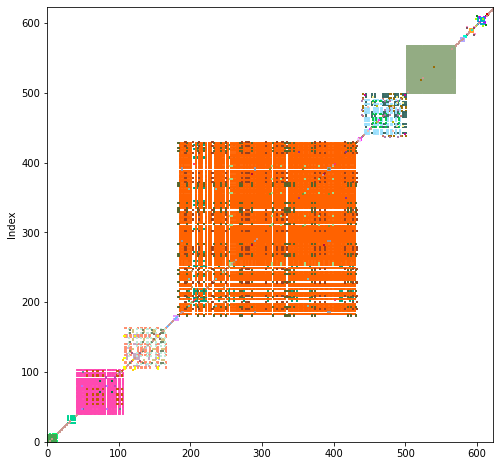

In [10]:
d_to_nearest_all,dis_group = cal_dist_to_nearest_all_exhaustive(df_unique,groupby=['V-GENE', 'J-GENE',"JUNCTION length"])
d_threshold = loc_min = 0.117886
clusters = cluster_HAC(dis_group, d_threshold)

## Clustering all samples

### 1. based on V-J annotation + CDR3 similarities

====== sample sample76 ======
All sequence: (32199, 7)
Unique CDR3 sequence: (1526, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 51.0): 
5 sequences, 20 calls, use 0.000090 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 72.0): 
4 sequences, 12 calls, use 0.000060 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 39.0): 
4 sequences, 12 calls, use 0.000044 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 42.0): 
3 sequences, 6 calls, use 0.000031 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 45.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 48.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18'

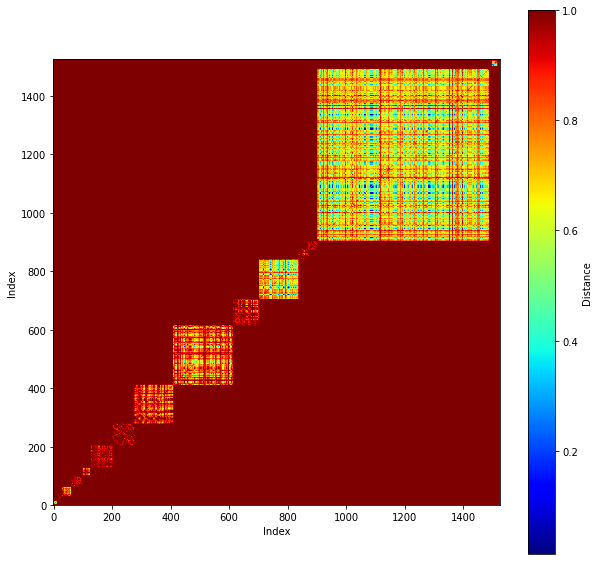



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 457 clusters


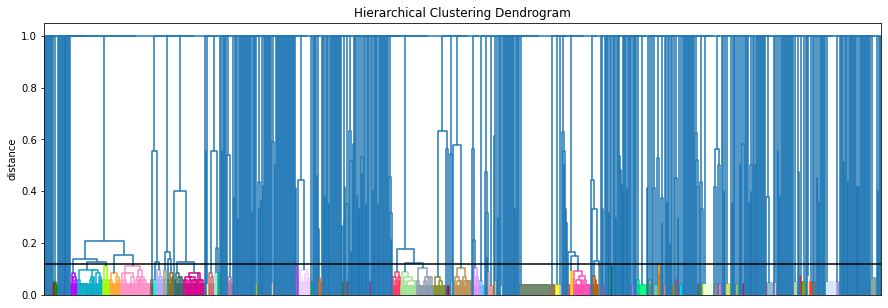

====== sample sample77 ======
All sequence: (27960, 7)
Unique CDR3 sequence: (1111, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 72.0): 
14 sequences, 182 calls, use 0.000689 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 48.0): 
8 sequences, 56 calls, use 0.000182 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 57.0): 
2 sequences, 2 calls, use 0.000024 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 72.0): 
56 sequences, 3080 calls, use 0.011230 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ5', 45.0): 
2 sequences, 2 calls, use 0.000023 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ5', 72.0): 
8 sequences, 56 calls, use 0.000245 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGH

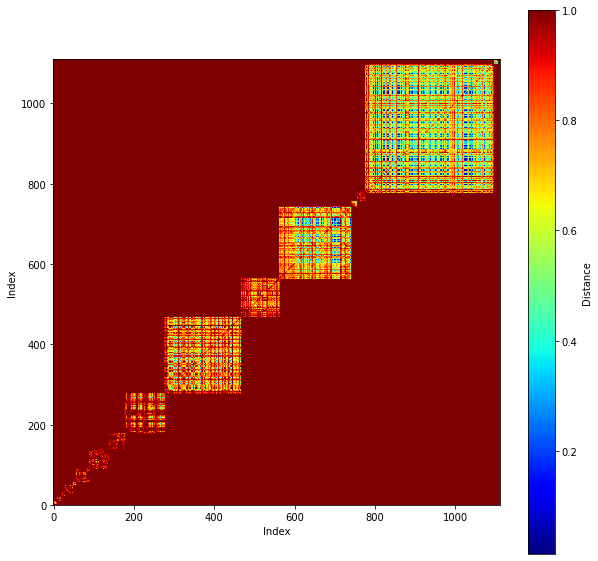



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 316 clusters


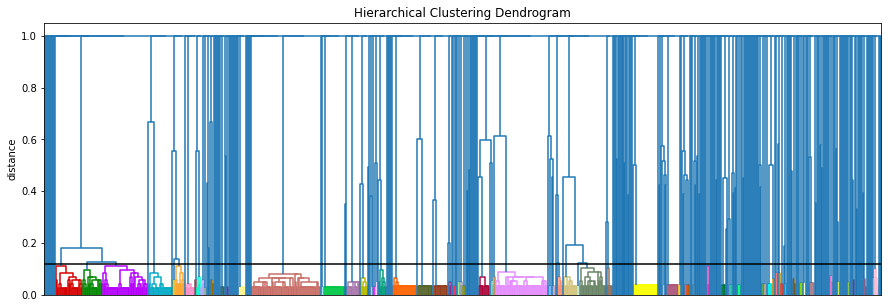

====== sample sample78 ======
All sequence: (30850, 7)
Unique CDR3 sequence: (1367, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 51.0): 
57 sequences, 3192 calls, use 0.008762 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 72.0): 
2 sequences, 2 calls, use 0.000025 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 45.0): 
8 sequences, 56 calls, use 0.000172 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 48.0): 
2 sequences, 2 calls, use 0.000023 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 54.0): 
3 sequences, 6 calls, use 0.000036 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 72.0): 
7 sequences, 42 calls, use 0.000181 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-

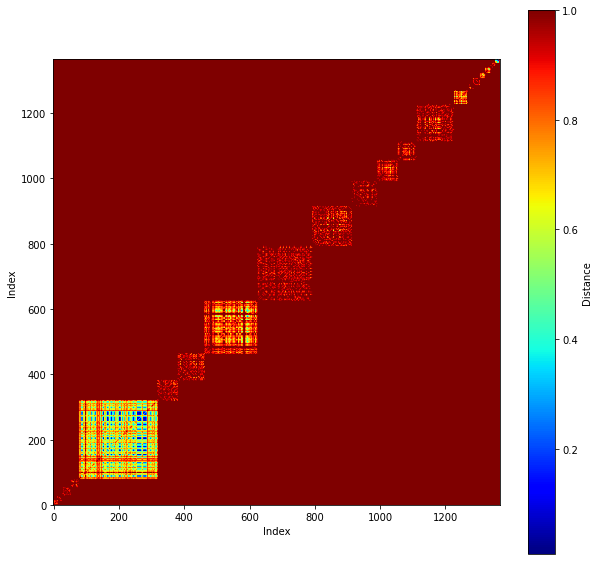



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 648 clusters


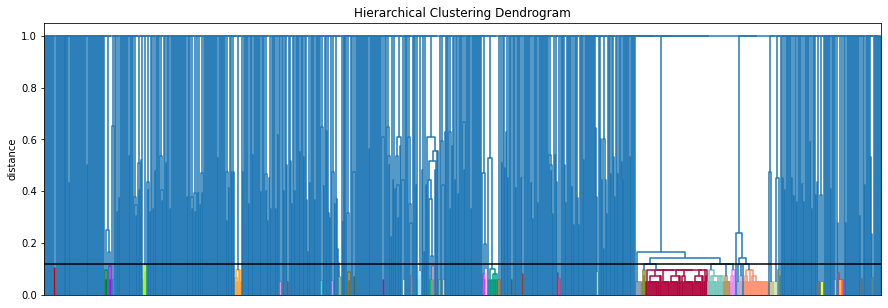

====== sample sample79 ======
All sequence: (18694, 7)
Unique CDR3 sequence: (994, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 51.0): 
80 sequences, 6320 calls, use 0.017273 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 33.0): 
6 sequences, 30 calls, use 0.000079 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 45.0): 
4 sequences, 12 calls, use 0.000051 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 48.0): 
7 sequences, 42 calls, use 0.000138 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 60.0): 
13 sequences, 156 calls, use 0.000547 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 72.0): 
7 sequences, 42 calls, use 0.000195 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IG

For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 75.0): 
5 sequences, 20 calls, use 0.000090 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ5', 42.0): 
3 sequences, 6 calls, use 0.000030 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ5', 54.0): 
2 sequences, 2 calls, use 0.000022 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ6', 87.0): 
8 sequences, 56 calls, use 0.000246 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV6-1', 'Homsap IGHJ5', 57.0): 
2 sequences, 2 calls, use 0.000022 seconds.


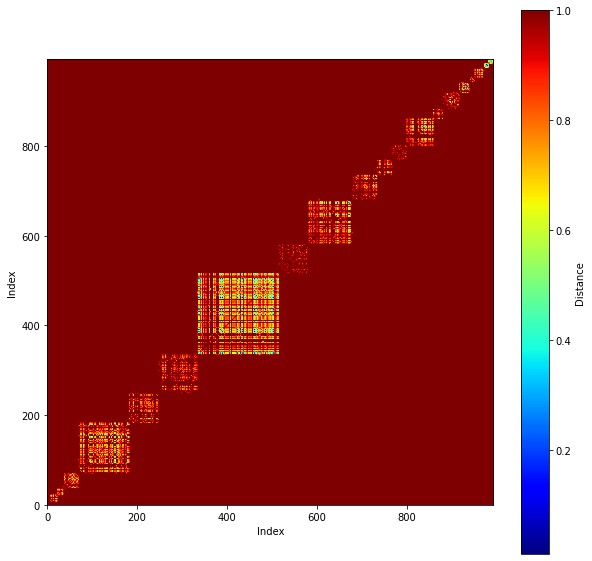



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 539 clusters


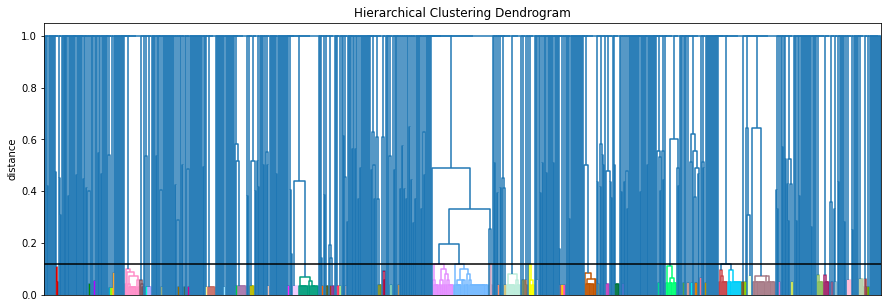

====== sample sample82 ======
All sequence: (32814, 7)
Unique CDR3 sequence: (758, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ1', 66.0): 
27 sequences, 702 calls, use 0.002275 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 51.0): 
27 sequences, 702 calls, use 0.001858 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 36.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 45.0): 
134 sequences, 17822 calls, use 0.043071 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 54.0): 
25 sequences, 600 calls, use 0.001713 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 60.0): 
32 sequences, 992 calls, use 0.002918 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Ho

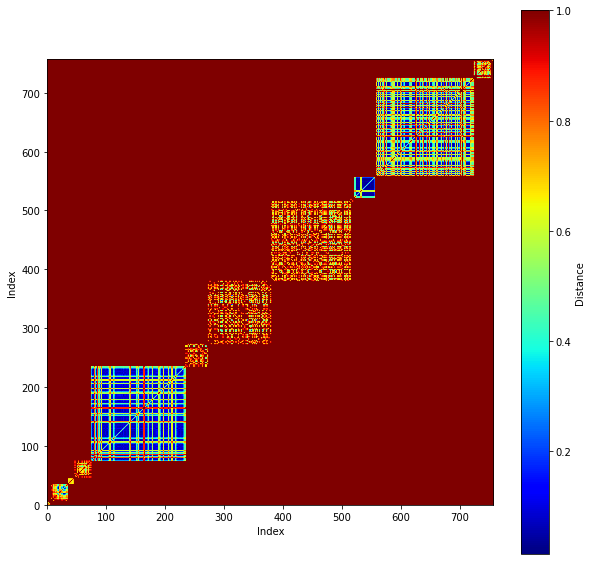



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 155 clusters


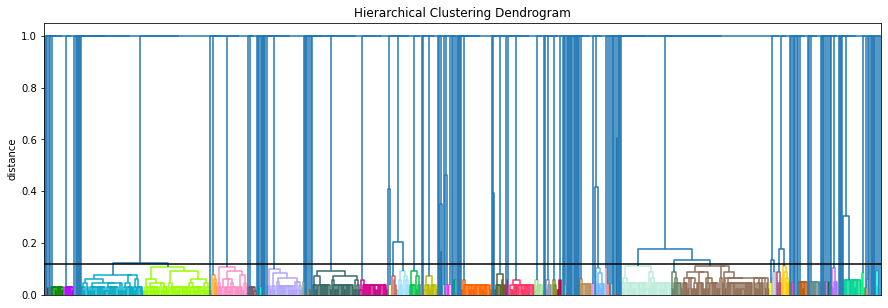

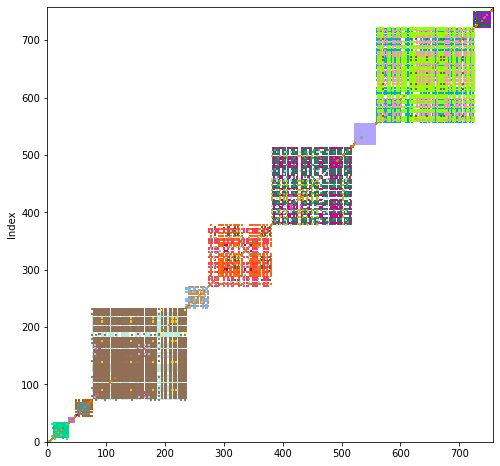

====== sample sample83 ======
All sequence: (33663, 7)
Unique CDR3 sequence: (884, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ1', 66.0): 
29 sequences, 812 calls, use 0.002559 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 51.0): 
28 sequences, 756 calls, use 0.001975 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 45.0): 
156 sequences, 24180 calls, use 0.057217 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 54.0): 
29 sequences, 812 calls, use 0.002270 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 60.0): 
33 sequences, 1056 calls, use 0.003039 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 72.0): 
3 sequences, 6 calls, use 0.000037 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('H

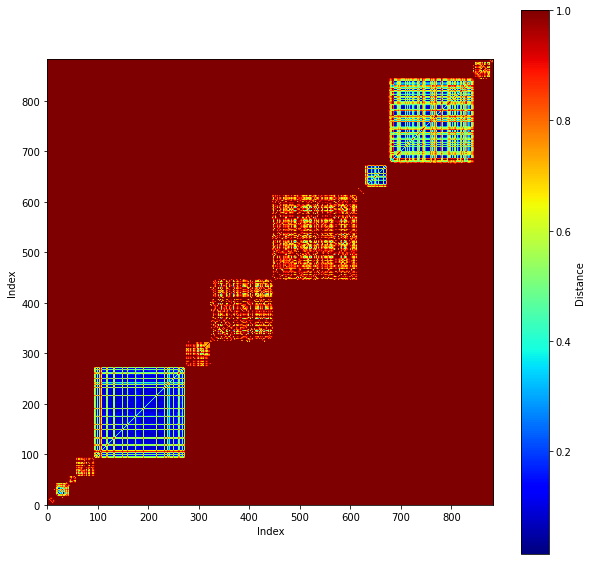



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 234 clusters


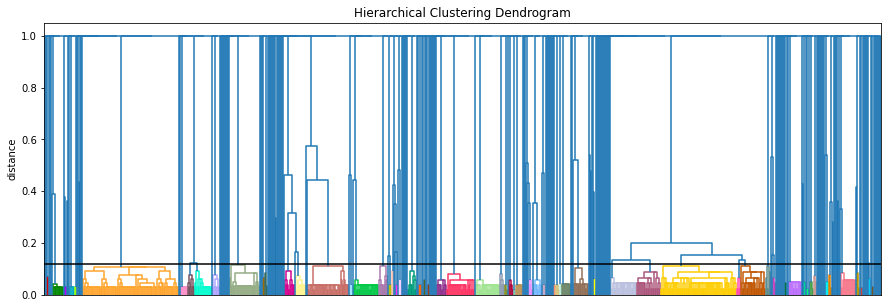

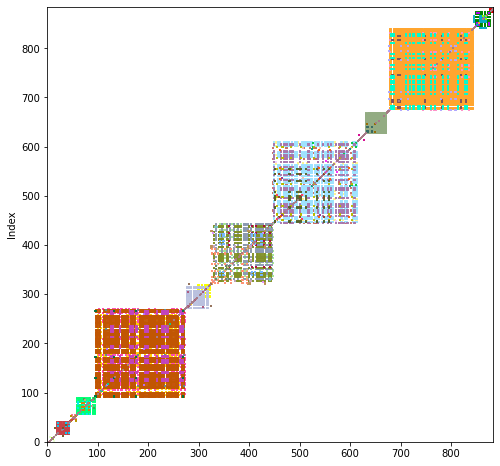

====== sample sample86 ======
All sequence: (19636, 7)
Unique CDR3 sequence: (822, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ5', 36.0): 
4 sequences, 12 calls, use 0.000051 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ6', 63.0): 
7 sequences, 42 calls, use 0.000143 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ6', 66.0): 
2 sequences, 2 calls, use 0.000022 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ6', 69.0): 
8 sequences, 56 calls, use 0.000202 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ6', 75.0): 
2 sequences, 2 calls, use 0.000023 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 57.0): 
8 sequences, 56 calls, use 0.000180 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 

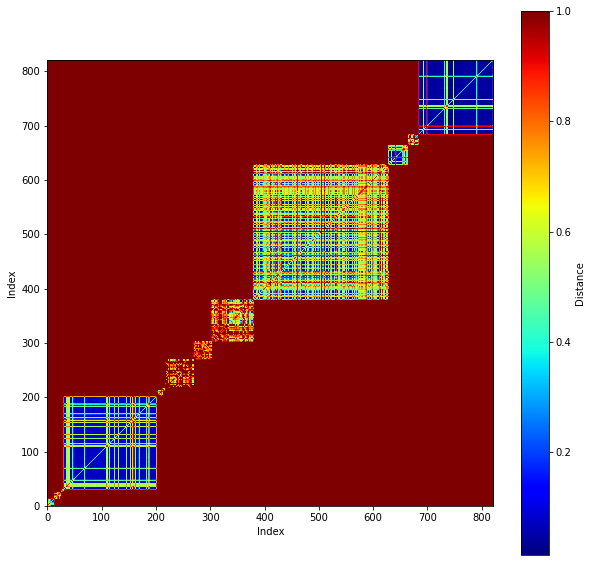



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 127 clusters


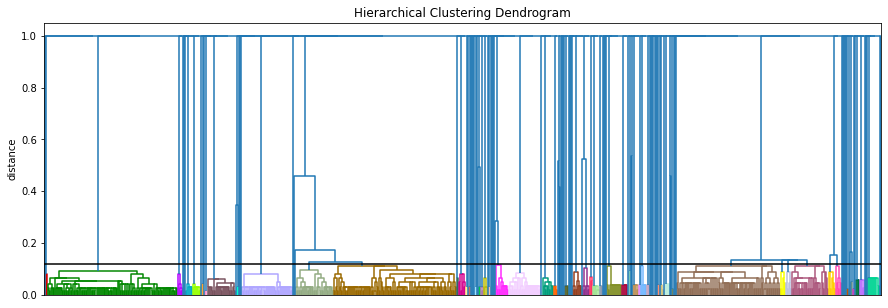

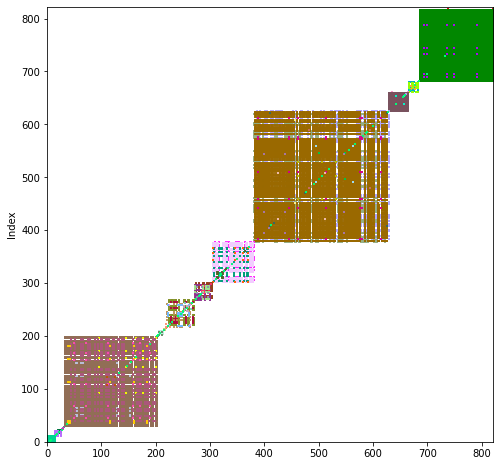

====== sample sample87 ======
All sequence: (27984, 7)
Unique CDR3 sequence: (1150, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ3', 60.0): 
2 sequences, 2 calls, use 0.000031 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 36.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 45.0): 
8 sequences, 56 calls, use 0.000144 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 51.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 54.0): 
3 sequences, 6 calls, use 0.000037 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 57.0): 
8 sequences, 56 calls, use 0.000173 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsa

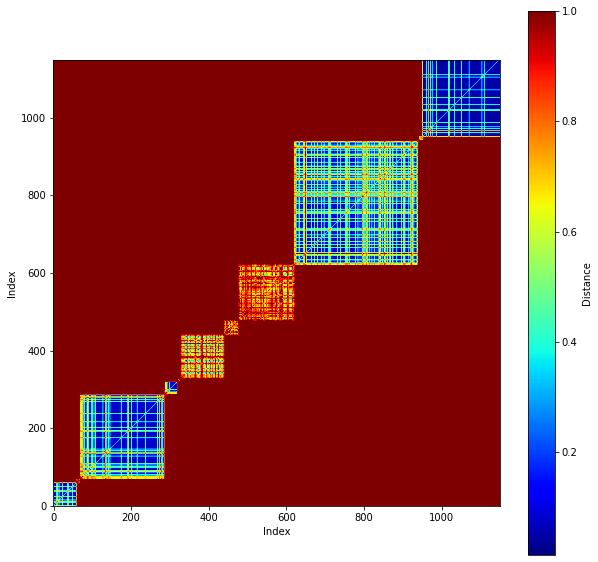



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 149 clusters


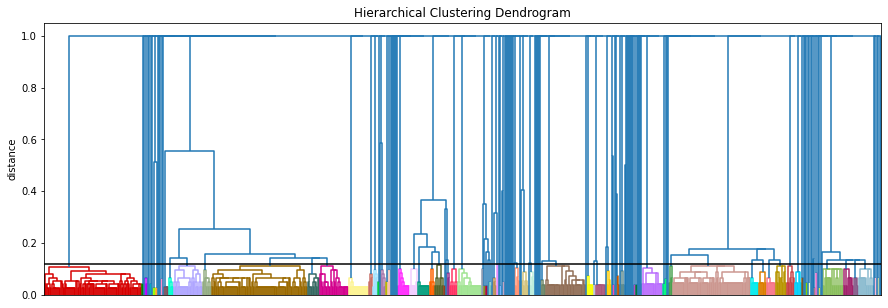

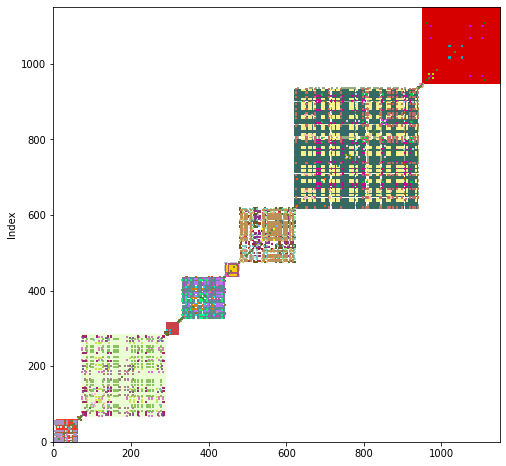

====== sample sample88 ======
All sequence: (25172, 7)
Unique CDR3 sequence: (831, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 36.0): 
90 sequences, 8010 calls, use 0.017301 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 45.0): 
14 sequences, 182 calls, use 0.000488 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 48.0): 
2 sequences, 2 calls, use 0.000022 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 57.0): 
3 sequences, 6 calls, use 0.000037 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ5', 36.0): 
7 sequences, 42 calls, use 0.000109 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ6', 54.0): 
6 sequences, 30 calls, use 0.000107 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV

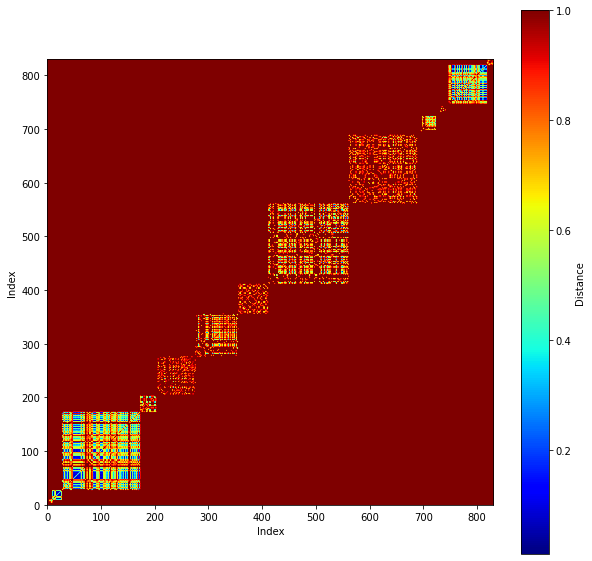



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 281 clusters


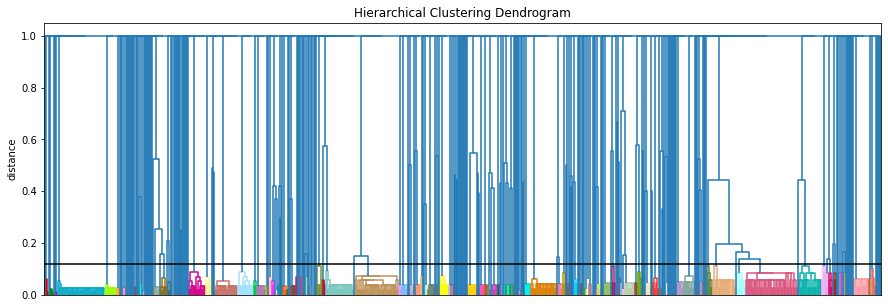

====== sample sample89 ======
All sequence: (21376, 7)
Unique CDR3 sequence: (693, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 66.0): 
3 sequences, 6 calls, use 0.000041 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 36.0): 
105 sequences, 10920 calls, use 0.023307 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 54.0): 
2 sequences, 2 calls, use 0.000024 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 57.0): 
12 sequences, 132 calls, use 0.000432 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ5', 36.0): 
6 sequences, 30 calls, use 0.000083 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ6', 54.0): 
2 sequences, 2 calls, use 0.000022 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGH

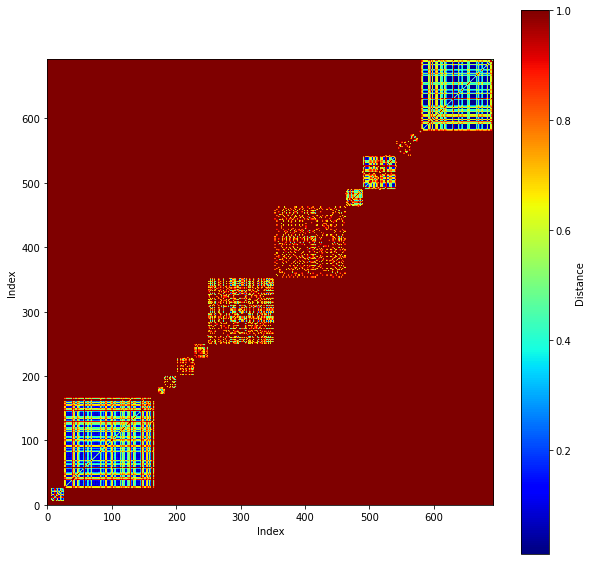



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 208 clusters


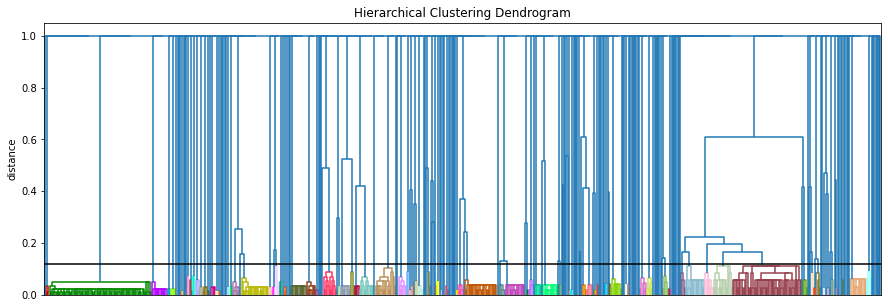

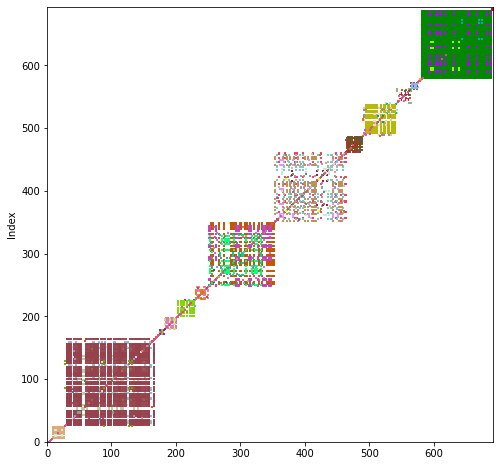

====== sample sample90 ======
All sequence: (19195, 7)
Unique CDR3 sequence: (623, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ3', 48.0): 
5 sequences, 20 calls, use 0.000074 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 24.0): 
6 sequences, 30 calls, use 0.000064 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 45.0): 
9 sequences, 72 calls, use 0.000191 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 48.0): 
4 sequences, 12 calls, use 0.000049 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ5', 60.0): 
2 sequences, 2 calls, use 0.000026 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 54.0): 
2 sequences, 2 calls, use 0.000022 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homs

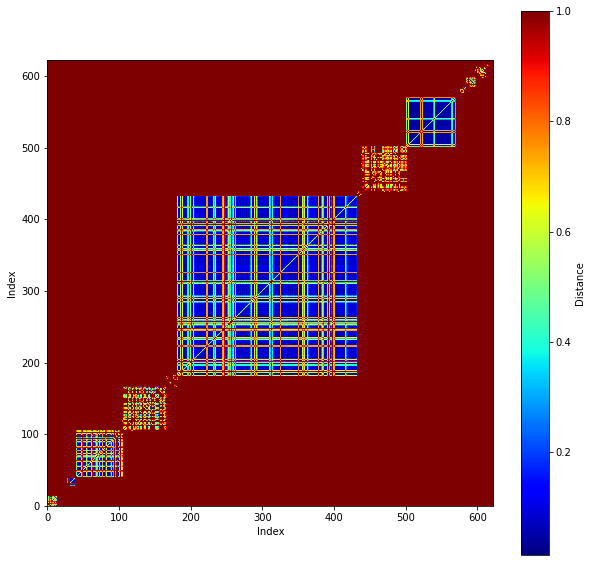



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 148 clusters


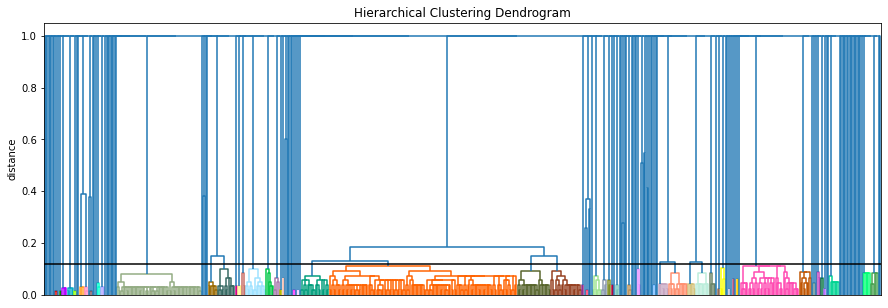

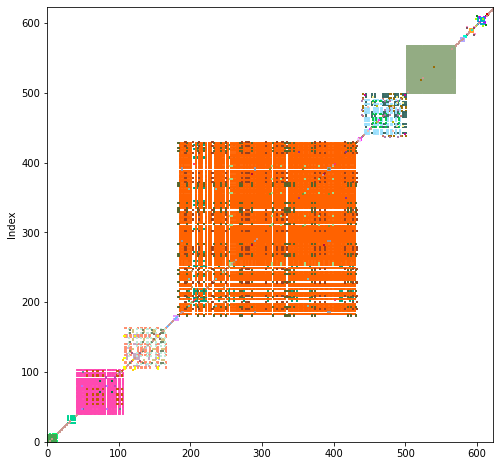

====== sample sample91 ======
All sequence: (24217, 7)
Unique CDR3 sequence: (850, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 24.0): 
32 sequences, 992 calls, use 0.001595 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 45.0): 
30 sequences, 870 calls, use 0.002320 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ4', 48.0): 
7 sequences, 42 calls, use 0.000124 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ5', 24.0): 
2 sequences, 2 calls, use 0.000022 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ5', 60.0): 
4 sequences, 12 calls, use 0.000053 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 54.0): 
3 sequences, 6 calls, use 0.000033 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', '

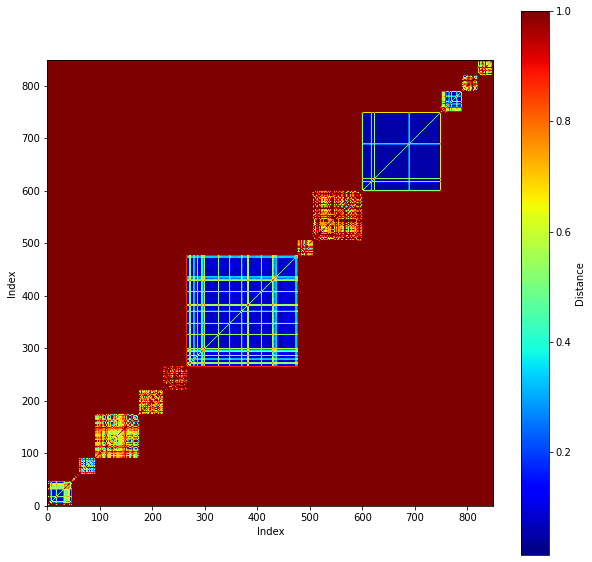



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 169 clusters


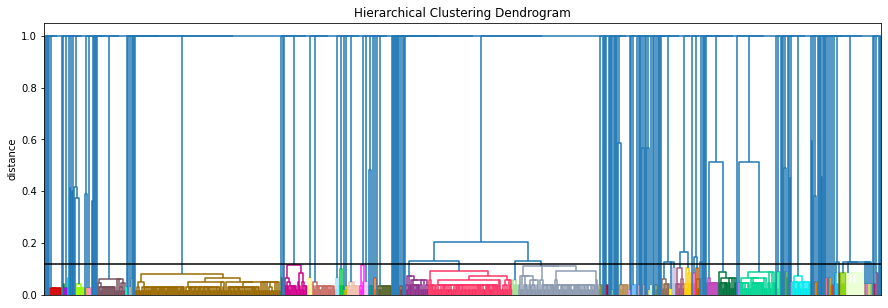

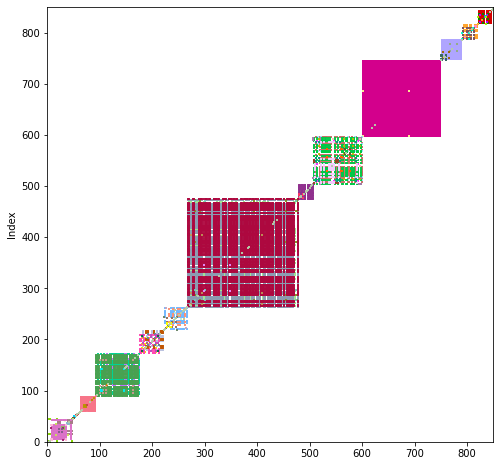

====== sample sample92 ======
All sequence: (22911, 7)
Unique CDR3 sequence: (921, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ1', 51.0): 
2 sequences, 2 calls, use 0.000030 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 75.0): 
5 sequences, 20 calls, use 0.000092 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 57.0): 
17 sequences, 272 calls, use 0.000848 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 60.0): 
3 sequences, 6 calls, use 0.000034 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 66.0): 
11 sequences, 110 calls, use 0.000365 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ5', 60.0): 
10 sequences, 90 calls, use 0.000272 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV

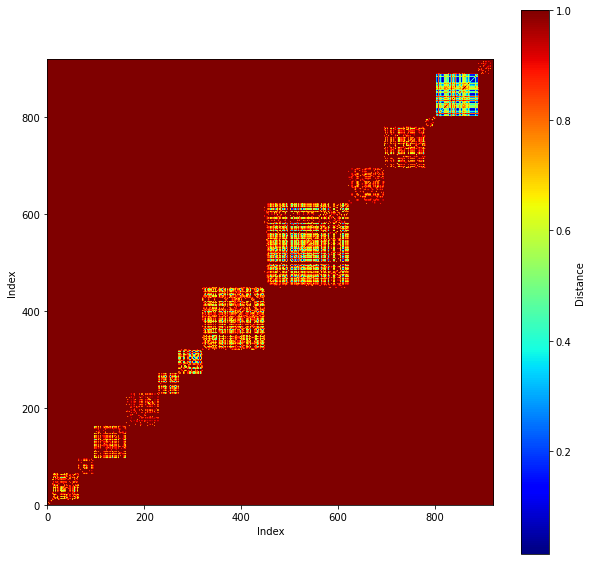



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 374 clusters


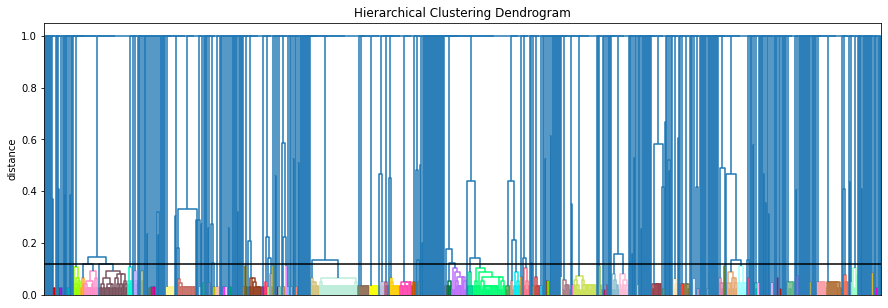

====== sample sample93 ======
All sequence: (20898, 7)
Unique CDR3 sequence: (1025, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 75.0): 
4 sequences, 12 calls, use 0.000070 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 63.0): 
4 sequences, 12 calls, use 0.000058 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 36.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 48.0): 
15 sequences, 210 calls, use 0.000559 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 57.0): 
6 sequences, 30 calls, use 0.000109 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ6', 57.0): 
6 sequences, 30 calls, use 0.000113 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1

For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30-3', 'Homsap IGHJ4', 60.0): 
13 sequences, 156 calls, use 0.000501 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30-3', 'Homsap IGHJ6', 57.0): 
2 sequences, 2 calls, use 0.000024 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30-3', 'Homsap IGHJ6', 63.0): 
2 sequences, 2 calls, use 0.000022 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30-3', 'Homsap IGHJ6', 69.0): 
2 sequences, 2 calls, use 0.000022 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30-3', 'Homsap IGHJ6', 96.0): 
2 sequences, 2 calls, use 0.000025 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-33', 'Homsap IGHJ3', 48.0): 
6 sequences, 30 calls, use 0.000091 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-33', 'Homsap IGHJ5', 60.0): 
2 sequences, 2 calls, use 0.000025 seconds.
For gr

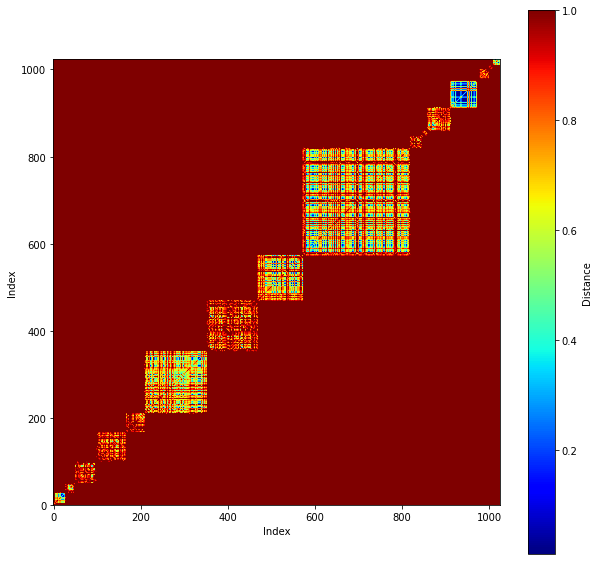



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 307 clusters


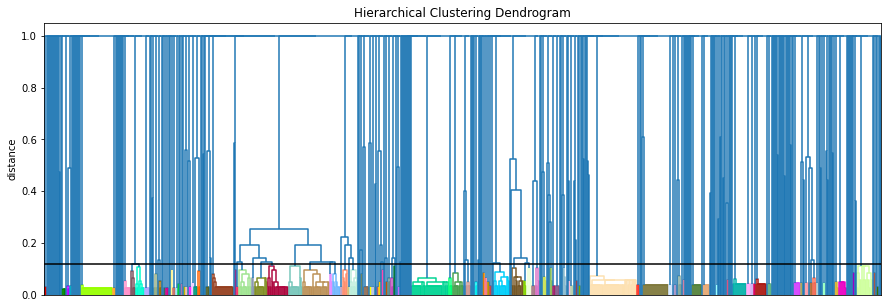

====== sample sample94 ======
All sequence: (34129, 7)
Unique CDR3 sequence: (1281, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 60.0): 
2 sequences, 2 calls, use 0.000034 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 63.0): 
2 sequences, 2 calls, use 0.000024 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ5', 54.0): 
3 sequences, 6 calls, use 0.000036 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ6', 51.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ6', 63.0): 
6 sequences, 30 calls, use 0.000109 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ6', 66.0): 
4 sequences, 12 calls, use 0.000056 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18',

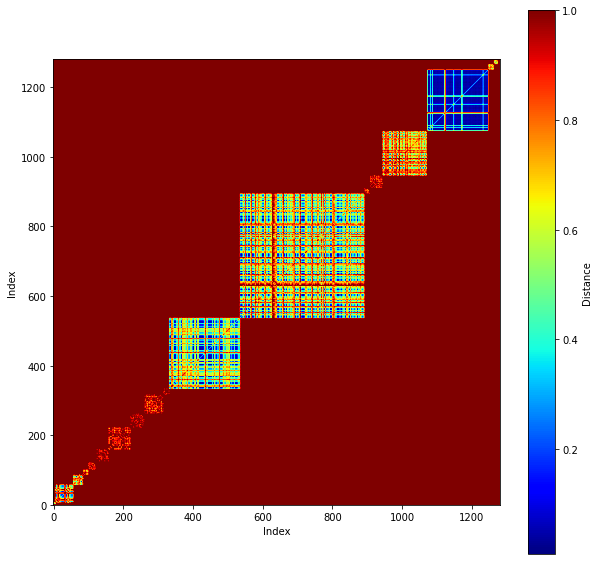



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 306 clusters


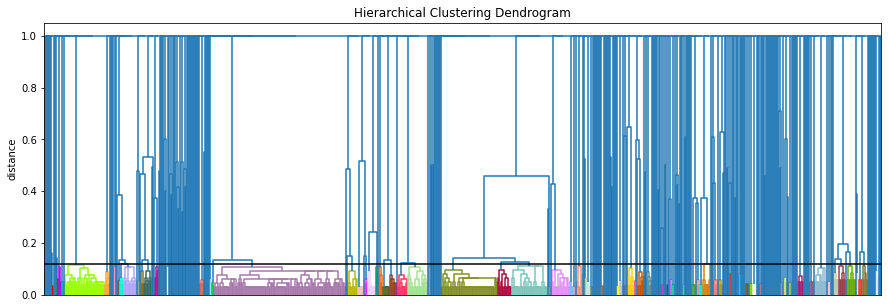

====== sample sample95 ======
All sequence: (32560, 7)
Unique CDR3 sequence: (1418, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 60.0): 
14 sequences, 182 calls, use 0.000641 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 78.0): 
5 sequences, 20 calls, use 0.000097 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 36.0): 
3 sequences, 6 calls, use 0.000031 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 63.0): 
2 sequences, 2 calls, use 0.000026 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ5', 54.0): 
7 sequences, 42 calls, use 0.000131 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ6', 48.0): 
2 sequences, 2 calls, use 0.000025 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-1

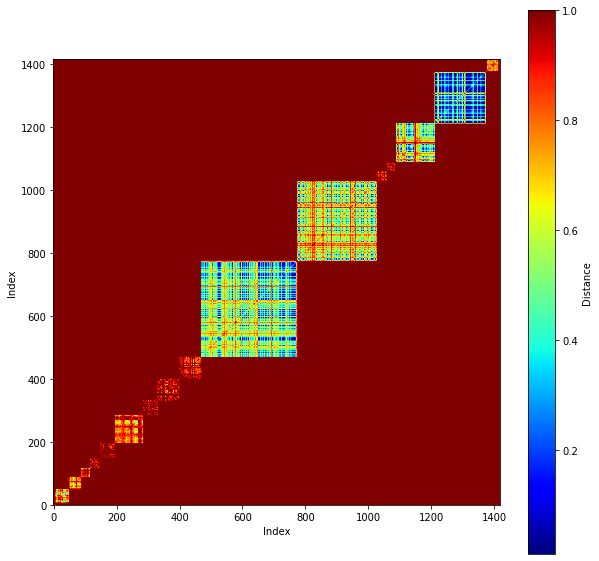



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 404 clusters


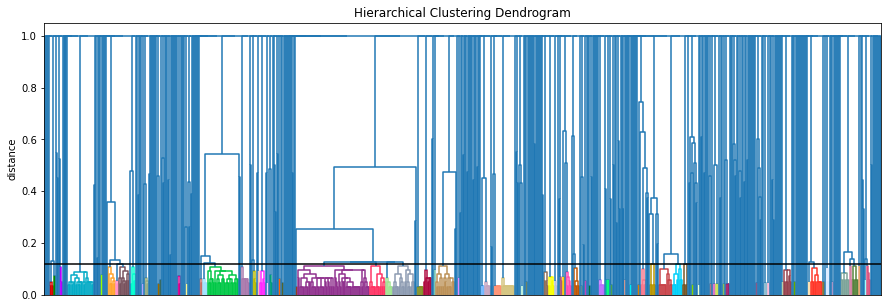

====== sample sample96 ======
All sequence: (29871, 7)
Unique CDR3 sequence: (1317, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ1', 51.0): 
3 sequences, 6 calls, use 0.000043 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 57.0): 
2 sequences, 2 calls, use 0.000025 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 45.0): 
4 sequences, 12 calls, use 0.000046 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 66.0): 
104 sequences, 10712 calls, use 0.034572 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 30.0): 
2 sequences, 2 calls, use 0.000019 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 33.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1

12 sequences, 132 calls, use 0.000346 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ4', 54.0): 
26 sequences, 650 calls, use 0.001868 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ4', 72.0): 
13 sequences, 156 calls, use 0.000548 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ5', 66.0): 
31 sequences, 930 calls, use 0.003203 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ5', 78.0): 
4 sequences, 12 calls, use 0.000060 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ6', 60.0): 
2 sequences, 2 calls, use 0.000023 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-5', 'Homsap IGHJ6', 66.0): 
29 sequences, 812 calls, use 0.002679 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV2-70', 'Homsap IGHJ4', 51.0): 
3 sequence

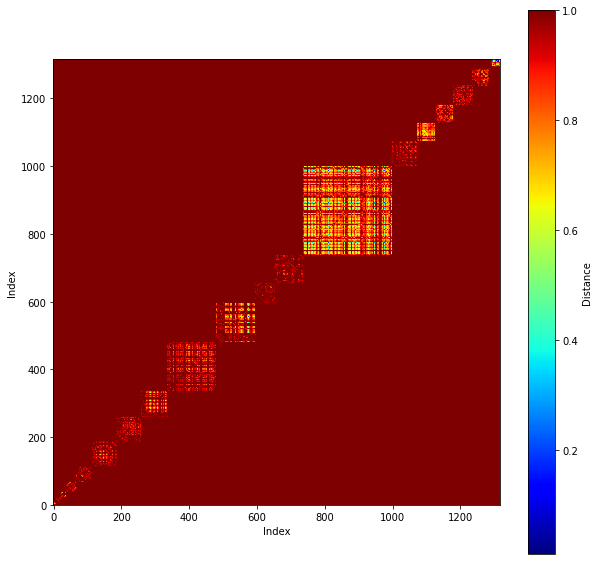



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 762 clusters


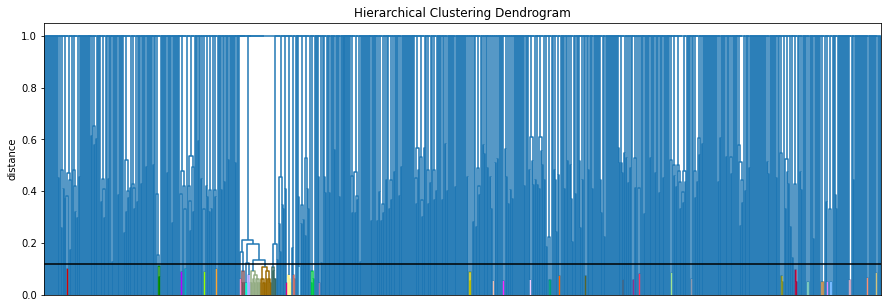

====== sample sample97 ======
All sequence: (31822, 7)
Unique CDR3 sequence: (1350, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 39.0): 
2 sequences, 2 calls, use 0.000032 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 63.0): 
3 sequences, 6 calls, use 0.000035 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 45.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 48.0): 
4 sequences, 12 calls, use 0.000055 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 60.0): 
3 sequences, 6 calls, use 0.000036 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 66.0): 
51 sequences, 2550 calls, use 0.008453 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-1

For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ5', 30.0): 
3 sequences, 6 calls, use 0.000031 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ5', 42.0): 
3 sequences, 6 calls, use 0.000032 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ5', 45.0): 
2 sequences, 2 calls, use 0.000020 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ5', 51.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ5', 57.0): 
2 sequences, 2 calls, use 0.000022 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ5', 69.0): 
2 sequences, 2 calls, use 0.000023 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ6', 51.0): 
7 sequences, 42 calls, use 0.000139 seconds.
For group ['V-GENE'

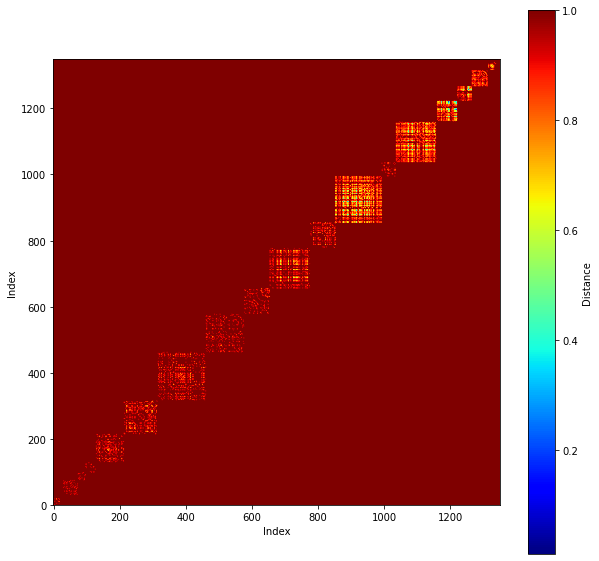



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 838 clusters


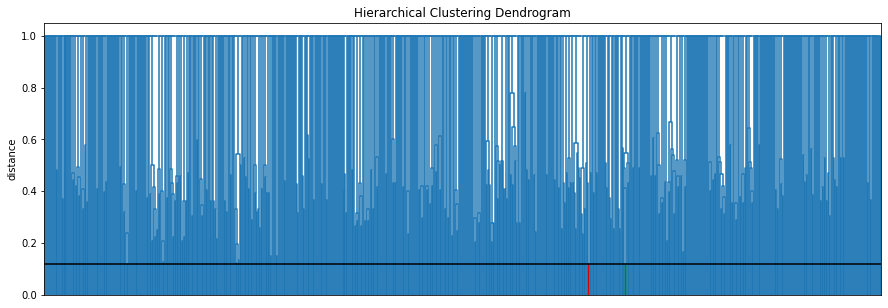

====== sample sample99 ======
All sequence: (29654, 7)
Unique CDR3 sequence: (1051, 7)
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 42.0): 
2 sequences, 2 calls, use 0.000029 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 48.0): 
4 sequences, 12 calls, use 0.000048 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ3', 54.0): 
3 sequences, 6 calls, use 0.000037 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 33.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 42.0): 
9 sequences, 72 calls, use 0.000196 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ4', 45.0): 
10 sequences, 90 calls, use 0.000264 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18

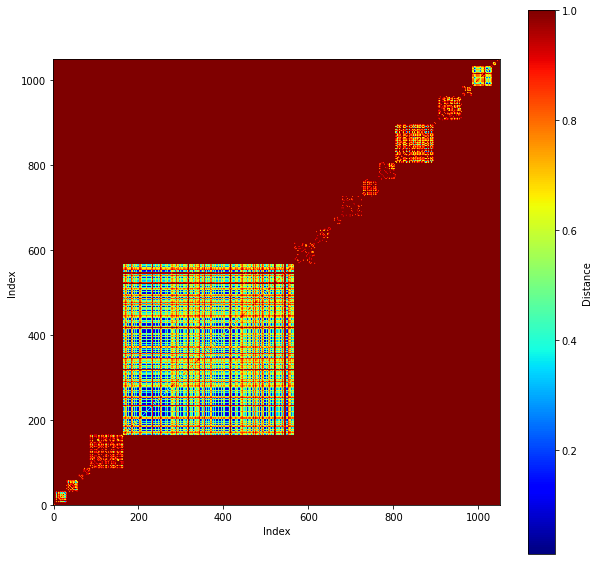



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = [0.11788618] there is 463 clusters


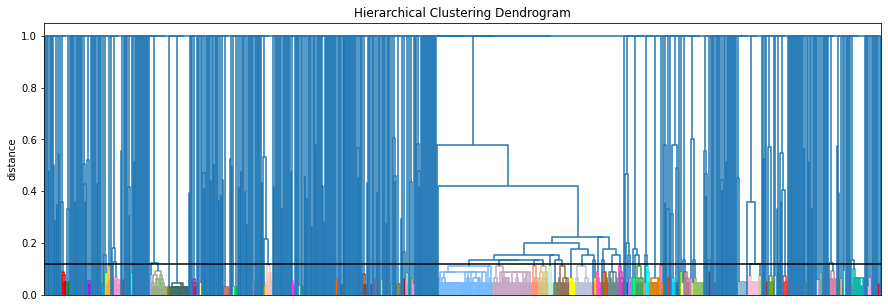

In [17]:
samples = ["sample%s"%n for n in [76,77,78,79,82,83,86,87,88,89,90,91,92,93,94,95,96,97,99]]
for sample in samples:
    print("====== sample %s ======"%sample)
    outfile = path_data+sample+"_Nt_info.csv"
    df = pd.read_csv(outfile,sep='\t')
    print("All sequence:",df.shape)
    df_unique = df.drop_duplicates(subset="JUNCTION", ignore_index=True)
    print("Unique CDR3 sequence:",df_unique.shape)
    d_to_nearest_all,dis_group = cal_dist_to_nearest_all_exhaustive(df_unique,groupby=['V-GENE', 'J-GENE',"JUNCTION length"])
    clusters = cluster_HAC(dis_group, d_threshold)
    np.save(path_data+"clustering_%s_a-based.npy"%sample,clusters)

## Clustering combined samples

### 1. based on CDR3

In [4]:
# %%time
# outfile = path_data+"sample76-99_Nt_info.csv"
# df = pd.read_csv(outfile,sep='\t')
# print("All sequence:",df.shape)
# df_unique = df.drop_duplicates(subset="JUNCTION", ignore_index=True)
# print("Unique junction sequence:",df_unique.shape)
# d_to_nearest_all,dis = cal_dist_to_nearest_all_exhaustive(df_unique,groupby=["JUNCTION length"])

All sequence: (515605, 7)
Unique junction sequence: (17793, 7)
For group ['JUNCTION length'] = 18.0: 
3 sequences, 6 calls, use 0.000042 seconds.
For group ['JUNCTION length'] = 21.0: 
5 sequences, 20 calls, use 0.000050 seconds.
For group ['JUNCTION length'] = 24.0: 
66 sequences, 4290 calls, use 0.007595 seconds.
For group ['JUNCTION length'] = 27.0: 
22 sequences, 462 calls, use 0.000918 seconds.
For group ['JUNCTION length'] = 30.0: 
153 sequences, 23256 calls, use 0.047143 seconds.
For group ['JUNCTION length'] = 33.0: 
145 sequences, 20880 calls, use 0.046147 seconds.
For group ['JUNCTION length'] = 36.0: 
523 sequences, 273006 calls, use 0.637833 seconds.
For group ['JUNCTION length'] = 39.0: 
323 sequences, 104006 calls, use 0.255954 seconds.
For group ['JUNCTION length'] = 42.0: 
708 sequences, 500556 calls, use 1.325299 seconds.
For group ['JUNCTION length'] = 45.0: 
1639 sequences, 2684682 calls, use 7.330177 seconds.
For group ['JUNCTION length'] = 48.0: 
969 sequences, 937

In [5]:
# np.save(path_data+"d_to_nearest_sample76-99_a-based.npy", d_to_nearest_all)
# np.save(path_data+"dis_sample76-99_a-based.npy", dis)

In [ ]:
d_to_nearest_all = np.load(path_data+"d_to_nearest_sample76-99_a-based.npy")
dis = np.load(path_data+"dis_sample76-99_a-based.npy")

Automatic pdb calling has been turned ON


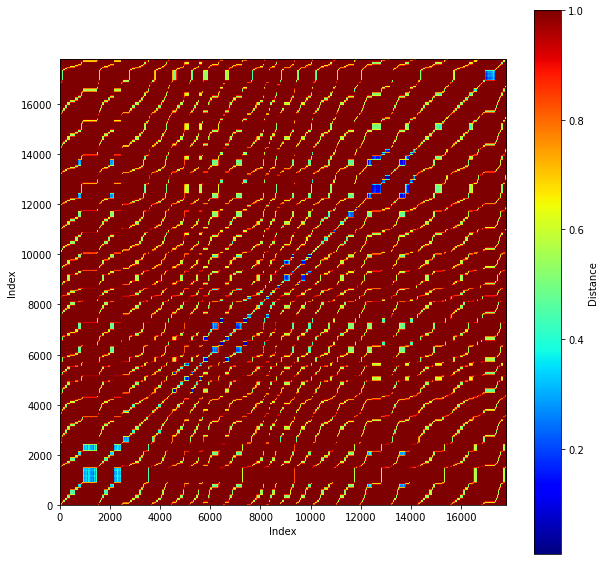



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = 0.117886 there is 3155 clusters


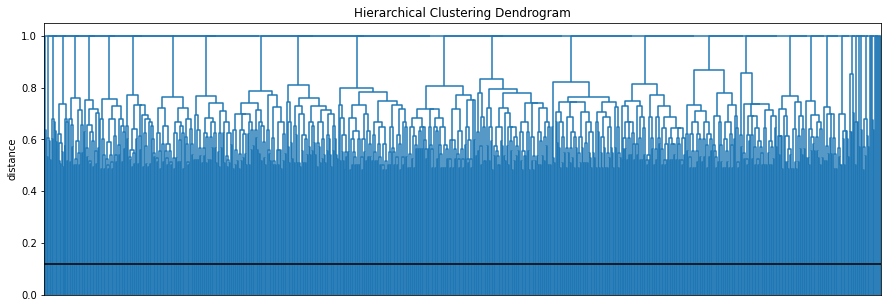

array([3125, 3094, 3075, ...,    2,    2,    2], dtype=int32)

In [5]:
%pdb
d_threshold = loc_min = 0.117886
cluster_HAC(dis, d_threshold)

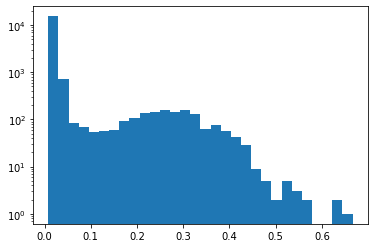

In [6]:
plt.hist(d_to_nearest_all,bins=30)
plt.yscale("log")

In [12]:
len(d_to_nearest_all)

17073

In [8]:
np.min(d_to_nearest_all)

0.008130081300813009

### 2. based on V-J annotation + CDR3 similarities

In [6]:
outfile = path_data+"sample76-99_Nt_info.csv"
df = pd.read_csv(outfile,sep='\t')
print("All sequence:",df.shape)
df_unique = df.drop_duplicates(subset="JUNCTION", ignore_index=True)
print("Unique junction sequence:",df_unique.shape)

All sequence: (515605, 7)
Unique junction sequence: (17793, 7)


For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ1', 48.0): 
3 sequences, 6 calls, use 0.000050 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ1', 51.0): 
6 sequences, 30 calls, use 0.000111 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ1', 66.0): 
45 sequences, 1980 calls, use 0.006499 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 39.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 57.0): 
3 sequences, 6 calls, use 0.000039 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 63.0): 
3 sequences, 6 calls, use 0.000035 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-18', 'Homsap IGHJ2', 75.0): 
9 sequences, 72 calls, use 0.000291 seconds.
For group ['V-

188 sequences, 35156 calls, use 0.113778 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ2', 57.0): 
4 sequences, 12 calls, use 0.000054 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ2', 60.0): 
3 sequences, 6 calls, use 0.000036 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ2', 63.0): 
8 sequences, 56 calls, use 0.000193 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ2', 75.0): 
4 sequences, 12 calls, use 0.000065 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ3', 39.0): 
2 sequences, 2 calls, use 0.000020 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ3', 48.0): 
10 sequences, 90 calls, use 0.000258 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ3', 51.0): 
10 sequences, 90

345 sequences, 118680 calls, use 0.454170 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 78.0): 
12 sequences, 132 calls, use 0.000590 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 81.0): 
16 sequences, 240 calls, use 0.001083 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 84.0): 
16 sequences, 240 calls, use 0.001096 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 87.0): 
7 sequences, 42 calls, use 0.000197 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 90.0): 
5 sequences, 20 calls, use 0.000113 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-2', 'Homsap IGHJ6', 93.0): 
2 sequences, 2 calls, use 0.000027 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-24', 'Homsap IGHJ2', 69.0): 
4 sequen

80 sequences, 6320 calls, use 0.024138 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-69D', 'Homsap IGHJ3', 45.0): 
2 sequences, 2 calls, use 0.000024 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-69D', 'Homsap IGHJ3', 63.0): 
7 sequences, 42 calls, use 0.000158 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-69D', 'Homsap IGHJ3', 66.0): 
2 sequences, 2 calls, use 0.000025 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-69D', 'Homsap IGHJ4', 42.0): 
7 sequences, 42 calls, use 0.000130 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-69D', 'Homsap IGHJ4', 45.0): 
5 sequences, 20 calls, use 0.000078 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-69D', 'Homsap IGHJ4', 48.0): 
8 sequences, 56 calls, use 0.000179 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-69D', 'Homsap IGHJ4', 51.0): 
3 seq

486 sequences, 235710 calls, use 0.839055 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ5', 78.0): 
5 sequences, 20 calls, use 0.000095 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ6', 45.0): 
16 sequences, 240 calls, use 0.000635 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ6', 48.0): 
5 sequences, 20 calls, use 0.000072 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ6', 51.0): 
103 sequences, 10506 calls, use 0.030877 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ6', 54.0): 
13 sequences, 156 calls, use 0.000483 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ6', 57.0): 
43 sequences, 1806 calls, use 0.006176 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV1-8', 'Homsap IGHJ6', 60.0): 
10

For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ3', 51.0): 
29 sequences, 812 calls, use 0.002476 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ3', 54.0): 
19 sequences, 342 calls, use 0.001116 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ3', 57.0): 
10 sequences, 90 calls, use 0.000311 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ3', 60.0): 
4 sequences, 12 calls, use 0.000055 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ3', 63.0): 
40 sequences, 1560 calls, use 0.005948 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ3', 66.0): 
19 sequences, 342 calls, use 0.001271 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-23', 'Homsap IGHJ3', 72.0): 
6 sequences, 30 calls, use 0.000136 seconds.
For

For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30-3', 'Homsap IGHJ3', 48.0): 
4 sequences, 12 calls, use 0.000056 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30-3', 'Homsap IGHJ3', 51.0): 
19 sequences, 342 calls, use 0.001021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30-3', 'Homsap IGHJ3', 66.0): 
2 sequences, 2 calls, use 0.000028 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30-3', 'Homsap IGHJ3', 69.0): 
3 sequences, 6 calls, use 0.000041 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30-3', 'Homsap IGHJ3', 72.0): 
4 sequences, 12 calls, use 0.000066 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30-3', 'Homsap IGHJ4', 30.0): 
2 sequences, 2 calls, use 0.000021 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV3-30-3', 'Homsap IGHJ4', 33.0): 
3 sequences, 6 calls, use 0.000030 seconds.
F

For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-34', 'Homsap IGHJ3', 54.0): 
7 sequences, 42 calls, use 0.000152 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-34', 'Homsap IGHJ3', 57.0): 
8 sequences, 56 calls, use 0.000205 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-34', 'Homsap IGHJ3', 60.0): 
3 sequences, 6 calls, use 0.000040 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-34', 'Homsap IGHJ3', 63.0): 
66 sequences, 4290 calls, use 0.013925 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-34', 'Homsap IGHJ3', 66.0): 
20 sequences, 380 calls, use 0.001376 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-34', 'Homsap IGHJ3', 81.0): 
2 sequences, 2 calls, use 0.000024 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV4-34', 'Homsap IGHJ4', 30.0): 
5 sequences, 20 calls, use 0.000057 seconds.
For group 

149 sequences, 22052 calls, use 0.067476 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 57.0): 
7 sequences, 42 calls, use 0.000155 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 60.0): 
39 sequences, 1482 calls, use 0.004876 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 63.0): 
7 sequences, 42 calls, use 0.000165 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 66.0): 
2 sequences, 2 calls, use 0.000023 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 72.0): 
6 sequences, 30 calls, use 0.000124 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ4', 75.0): 
6 sequences, 30 calls, use 0.000129 seconds.
For group ['V-GENE', 'J-GENE', 'JUNCTION length'] = ('Homsap IGHV5-51', 'Homsap IGHJ5', 42.0): 
3 sequ

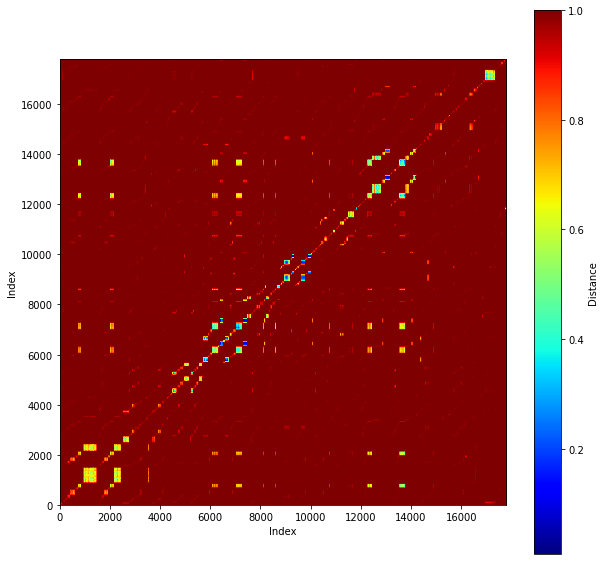



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = 0.117886 there is 5690 clusters


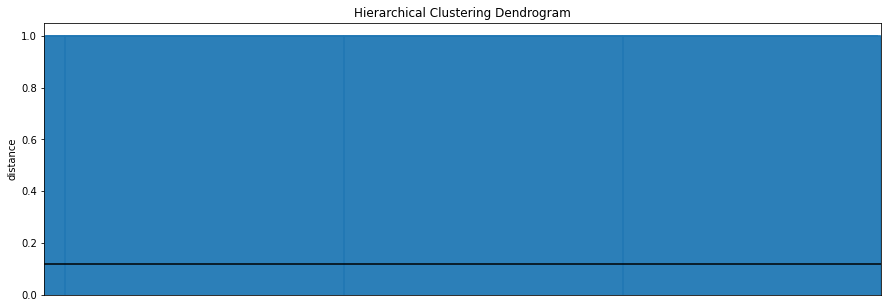

array([4971, 4267, 2004, ...,    1,    1,    1], dtype=int32)

In [9]:
# d_to_nearest_all,dis_group = cal_dist_to_nearest_all_exhaustive(df_unique,groupby=['V-GENE', 'J-GENE',"JUNCTION length"])
# d_threshold = loc_min = 0.117886
# cluster_HAC(dis_group, d_threshold)

In [10]:
# np.save(path_data+"d_to_nearest_sample76-99_a-based_VJ.npy", d_to_nearest_all)
# np.save(path_data+"dis_sample76-99_a-based_VJ.npy", dis)

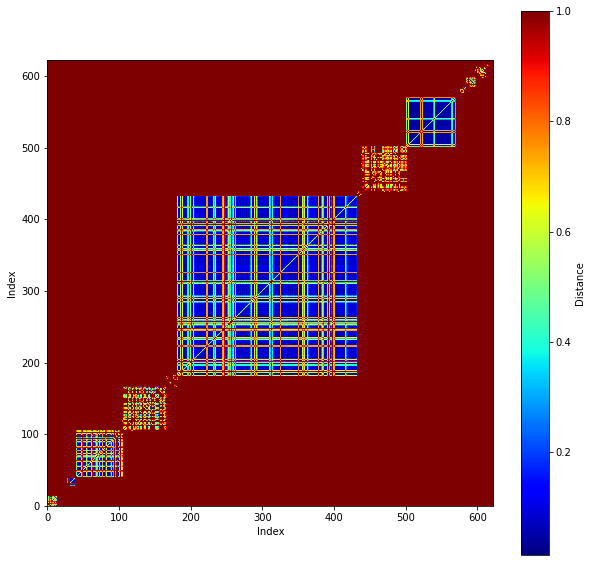



  Calculating information clusters with hierarchical clustering...
    For a threshold distance of d = 0.117886 there is 148 clusters


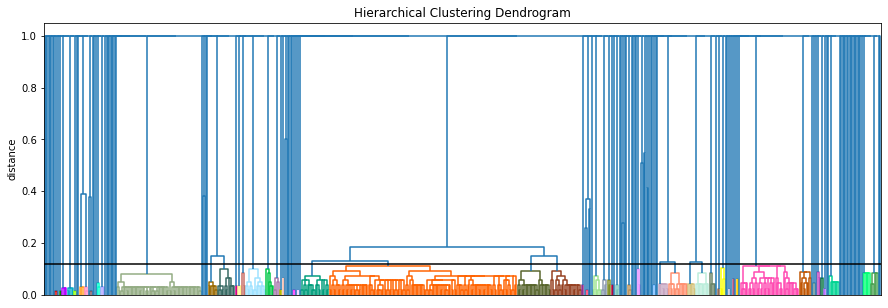

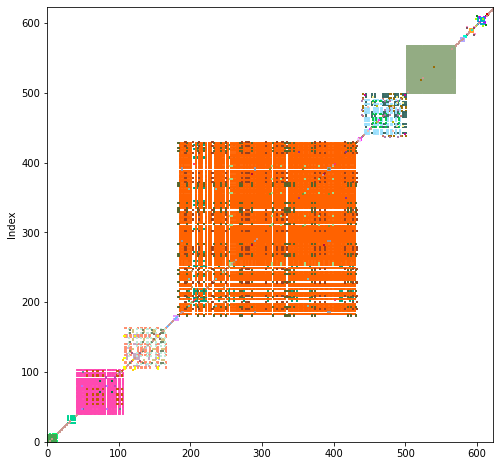

In [12]:
d_to_nearest_all = np.load(path_data+"d_to_nearest_sample76-99_a-based_VJ.npy")
dis = np.load(path_data+"dis_sample76-99_a-based_VJ.npy")
d_threshold = loc_min = 0.117886
clusters = cluster_HAC(dis_group, d_threshold)
np.save(path_data+"clustering_76-99_a-based.npy",clusters)

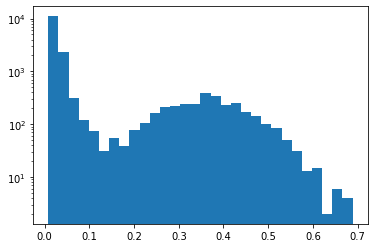

In [11]:
plt.hist(d_to_nearest_all,bins=30)
plt.yscale("log")